11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
422/422 - 4s - 11ms/step - accuracy: 0.8969 - loss: 1.2934 - val_accuracy: 0.9448 - val_loss: 0.6232
Epoch 2/20
422/422 - 4s - 9ms/step - accuracy: 0.9384 - loss: 0.5384 - val_accuracy: 0.9578 - val_loss: 0.4169
Epoch 3/20
422/422 - 3s - 7ms/step - accuracy: 0.9489 - loss: 0.4105 - val_accuracy: 0.9665 - val_loss: 0.3388
Epoch 4/20
422/422 - 5s - 12ms/step - accuracy: 0.9559 - loss: 0.3492 - val_accuracy: 0.9662 - val_loss: 0.3110
Epoch 5/20
422/422 - 5s - 13ms/step - accuracy: 0.9589 - loss: 0.3150 - val_accuracy: 0.9698 - val_loss: 0.2787
Epoch 6/20
422/422 - 5s - 11ms/step - accuracy: 0.9620 - loss: 0.2917 - val_accuracy: 0.9683 - val_loss: 0.2653
Epoch 7/20
422/422 - 6s - 14ms/step - accuracy: 0.9654 - loss: 0.2719 - val_accuracy: 0.9725 - val_loss: 0.2483
Epoch 8/20
422/422 - 4s - 10ms/step - accuracy: 0.9672 - loss: 0.2603 - val_accuracy: 0.9738 - val_loss: 0.2376
Epoch 9/20
422/422 - 5s - 12ms/step - accuracy: 0.9685 - loss: 0.2471 - val_accuracy: 0.9730 - val_loss: 0

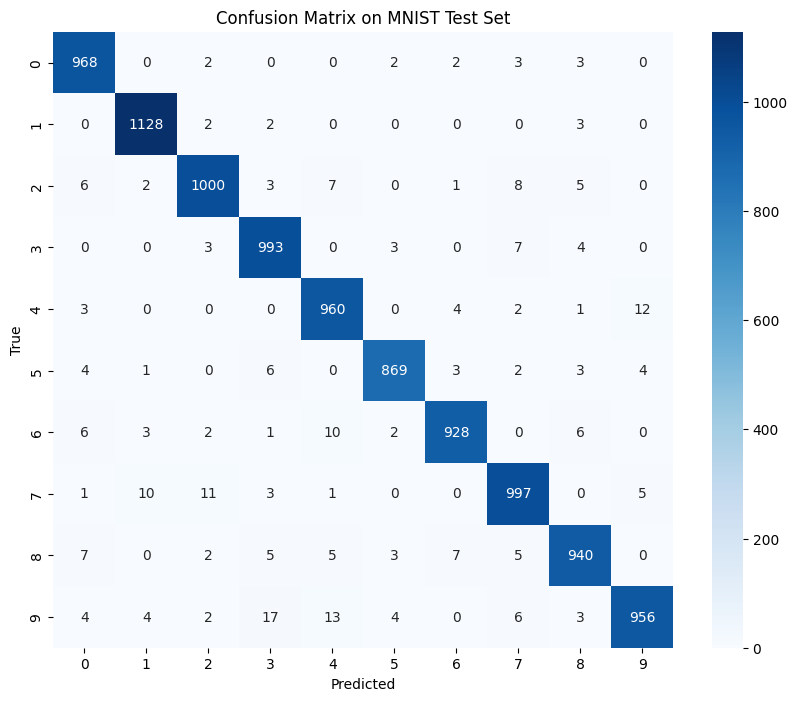

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

# Flatten images
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Build MLP with L1/L2 Regularization
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=128,
                    validation_split=0.1, verbose=2)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {test_acc}")

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix on MNIST Test Set")
plt.show()
